# Case 10 - HR Analytics

**Context.** 

You are an HR analyst at a big technological firm based in Colombia

**Problem.** 

You are requiered to understand the variables that affect how many years a person is going to stay at the company and be able to predict it.

**Analytical Context.** 

You must:
- Develop a linear regression model for the data. 
- Look for any potential problem in the assumptions of the model and solve them. 
- Obtain the most relevant parameters that explain the distribution.

## Packages Import

In [1]:
!pip install statsmodels

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import diagnostic

from pandas.plotting import scatter_matrix
import statsmodels.graphics.correlation

from sklearn.linear_model import  Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

## Data Import

All data used on this case is fictional. Created by IBM engineers and obtained from [Kaggle](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset).


In [3]:
df_HR = pd.read_csv('/work/indu5012_case_10/data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df_HR.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df_HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Exploratory Data Analysis

In order to deal with possible outliers, an exploratory data analysis is run. 

In [5]:

df_HR[df_HR['Attrition']=='Yes']
df_HR.drop(columns=['Attrition','EmployeeCount','EmployeeNumber','Over18','BusinessTravel','Department','EducationField','JobRole','MaritalStatus','OverTime','Gender'],inplace = True)
df_HR.columns


Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:89: UserWarning: Attempting to set identical left == right == 80.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:90: UserWarning: Attempting to set identical bottom == top == 80.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 80.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


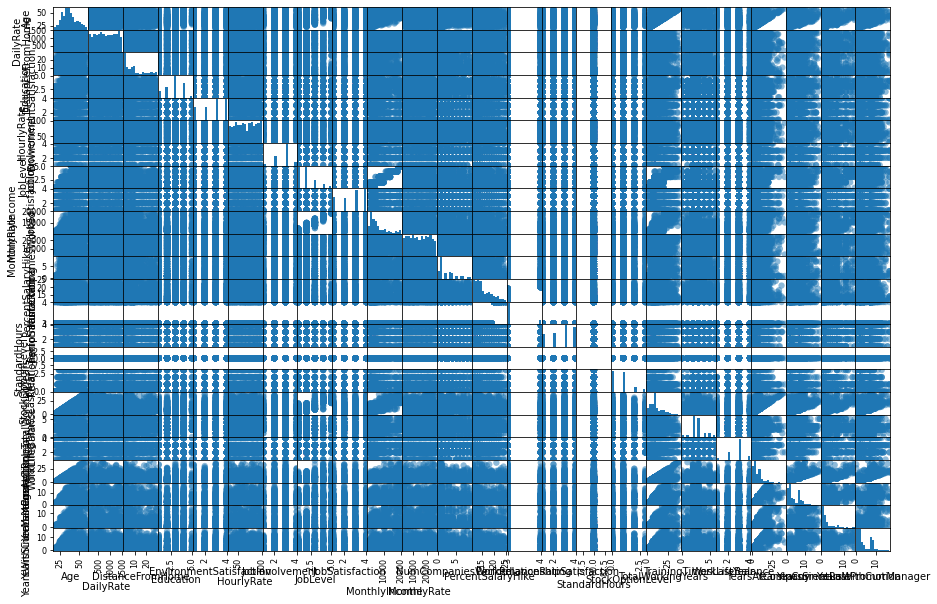

In [6]:
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(df_HR, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(15,10), cmap=cmap)

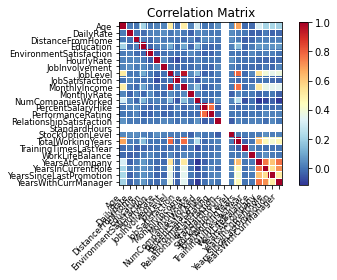

In [7]:
corr_mat = df_HR.corr()
statsmodels.graphics.correlation.plot_corr(corr_mat,xnames=df_HR.columns, ynames=df_HR.columns);

## Lineal Regression

In [8]:
def formula_from_cols(df, y):
    return y + ' ~ ' + ' + '.join([col for col in df if not col==y])

print(formula_from_cols(df_HR, "YearsAtCompany"))



YearsAtCompany ~ Age + DailyRate + DistanceFromHome + Education + EnvironmentSatisfaction + HourlyRate + JobInvolvement + JobLevel + JobSatisfaction + MonthlyIncome + MonthlyRate + NumCompaniesWorked + PercentSalaryHike + PerformanceRating + RelationshipSatisfaction + StandardHours + StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager


                            OLS Regression Results                            
Dep. Variable:         YearsAtCompany   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     236.0
Date:                Sat, 26 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:32:40   Log-Likelihood:                -3630.3
No. Observations:                1470   AIC:                             7307.
Df Residuals:                    1447   BIC:                             7428.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

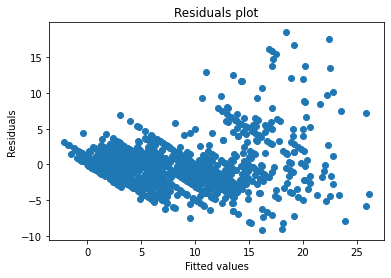

In [9]:
est = smf.ols('YearsAtCompany ~ Age + DailyRate + DistanceFromHome + Education + EnvironmentSatisfaction + HourlyRate + JobInvolvement + JobLevel + JobSatisfaction + MonthlyIncome + MonthlyRate + NumCompaniesWorked + PercentSalaryHike + PerformanceRating + RelationshipSatisfaction + StandardHours + StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager', df_HR).fit()
print(est.summary())

#Residual plot 
plt.scatter(est.fittedvalues,est.resid)
plt.ylabel('Residuals')
plt.xlabel('Fitted values')
plt.title('Residuals plot')
plt.show()

## Excercise 1

Run a lineal model for all the numerical variables of the model. What can you conclude about it? What variables are significant on the model? What can you tell about the residuals of the model? 

**Answer**

## Excercise 2

Check the model for Heteroskedasticity. What can you tell from the results of the test?

**Answer**

## Excercise 3

Check the model for Multicollinearity. What can you conclude about it?

**Answer**

## Excercise 4

What variable transformation would you think that would help to improve the model? Run the new models and compare the results with previous models.

**Answer**

## Excercise 5

Run a Forward stepwise selection model on the dataset. What can you conclude about it?

**Answer**

## Excercise 6

Run a Backward stepwise selection model on the dataset. What can you conclude about it?

**Answer**

## Excercise 7

Run a Lasso model on the dataset. What can you conclude about it?

**Answer**

## Excercise 8

Run a Ridge Model on the dataset. What can you conclude about it?

**Answer**

## Excercise 9

Run a k-fold cross-validation model. What can you conclude about the coefficients?

**Answer**

## Excercise 10

Run a Bootstrap validation model. What can you conclude about the coefficients?

**Answer**

Check the studentized residuals in order to find any not-so-obvious outliers. What can you conclude about it?

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=96262903-a28f-4719-a328-dc59e3cfa77f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>